In [1]:

!pip install chembl_webresource_client

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install chembl_webresource-client
!pip install "setuptools<81"
!pip install --upgrade chembl_webresource_client

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

C:\Users\Fateme\AppData\Roaming\Python\Python313\site-packages\chembl_webresource_client\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __version__ = __import__('pkg_resources').get_distribution('chembl_webresource_client').version


In [2]:
! mkdir "C:\Users\Fateme\OneDrive\Jupyter\My_Projects\data"

A subdirectory or file C:\Users\Fateme\OneDrive\Jupyter\My_Projects\data already exists.


### Target Identification (KRAS) ### 
Search ChEMBL for the KRAS target and select the most relevant entry

In [2]:
target = new_client.target
target_query = target.search("KRAS")
targets = pd.DataFrame.from_dict(target_query)
targets.head(10)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,GTPase KRas,19.0,False,CHEMBL2189121,"[{'accession': 'P01116', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Protein cereblon-KRAS,19.0,False,CHEMBL5483196,"[{'accession': 'P01116', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,von Hippel-Lindau disease tumor suppressor/KRAS,18.0,False,CHEMBL5169273,"[{'accession': 'P01116', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,[],Homo sapiens,SOS1-KRAS,18.0,False,CHEMBL5465393,"[{'accession': 'Q07889', 'component_descriptio...",PROTEIN COMPLEX,9606
4,[],Homo sapiens,PDE6D/KRAS,17.0,False,CHEMBL4523623,"[{'accession': 'O43924', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Homo sapiens,GTPase KRas/RAF1,17.0,False,CHEMBL5291977,"[{'accession': 'P04049', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
6,[],Homo sapiens,RAS,15.0,False,CHEMBL4524006,"[{'accession': 'P01112', 'component_descriptio...",PROTEIN FAMILY,9606


### Reterive Bioactivity data for selected target ###
We prefer single protein target_type and from Homo sapiens organism

In [3]:
selected_target=targets.target_chembl_id[0]
selected_target

'CHEMBL2189121'

### Now retrieve only bioactivity data for target; **GTPase KRas(CHEMBL2189121) with reported IC 50 values in nM (nanomolar) unit.** ###

In [4]:
activity = new_client.activity
results = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
len(results)


5760

In [5]:
df1 = pd.DataFrame(list(results))
df1.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,13352855,[],CHEMBL2399318,Inhibition of full-length human KRas4B (amino ...,B,None,None,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,155.0
1,None,None,13352856,[],CHEMBL2399319,Inhibition of full-length human KRas4B (amino ...,B,None,None,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,342.0
2,None,None,14548911,[],CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,P01116,G12V,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,1.2
3,None,None,14548912,[],CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,P01116,G12V,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,10.0
4,None,None,14548913,[],CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,P01116,G12V,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,1.8


In [6]:
df1.standard_type.unique()

array(['IC50'], dtype=object)

### Finally Save the resulting bioactivity data to a CSV file bioactivity_raw_data.csv.

In [7]:
df1.to_csv('bioactivity_raw_data.csv', index=False)

### Now copy "bioactivity_raw_data.csv" file to Google Drive, in foler "data"

In [8]:
!copy bioactivity_raw_data.csv "C:\Users\Fateme\OneDrive\Jupyter\My_Projects\data"

        1 file(s) copied.


In [9]:
!dir "C:\Users\Fateme\OneDrive\Jupyter\My_Projects\data"

 Volume in drive C is Windows
 Volume Serial Number is DC52-E87E

 Directory of C:\Users\Fateme\OneDrive\Jupyter\My_Projects\data

02/09/2026  10:56 AM    <DIR>          .
02/06/2026  12:52 PM    <DIR>          ..
02/09/2026  12:43 PM           825,937 bioactivity_preprocessed_data.csv
02/10/2026  08:06 AM         8,623,802 bioactivity_raw_data.csv
               2 File(s)      9,449,739 bytes
               2 Dir(s)  115,169,382,400 bytes free


### Bioactivity Data Retrieval (IC50)
Retrieve bioactivity data (IC50) for the selected KRAS target.

Inspect Missing Values

In [10]:
df1["standard_type"].isna().sum()

np.int64(0)

Filter Rows with Valid Bioactivity Values

In [11]:
df2 = df1[df1["standard_value"].notna()]
df2.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,13352855,[],CHEMBL2399318,Inhibition of full-length human KRas4B (amino ...,B,None,None,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,155.0
1,None,None,13352856,[],CHEMBL2399319,Inhibition of full-length human KRas4B (amino ...,B,None,None,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,342.0
2,None,None,14548911,[],CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,P01116,G12V,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,1.2
3,None,None,14548912,[],CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,P01116,G12V,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,10.0
4,None,None,14548913,[],CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,P01116,G12V,BAO_0000190,...,Homo sapiens,GTPase KRas,9606,None,None,IC50,uM,UO_0000065,None,1.8


### Assign Bioactivity Classes Define active, intermediate, and inactive classes based on IC50 values.

In [12]:
bioactivity_class=[]
for value in df2.standard_value:
    value=float(value)
    if value>=10000:
        bioactivity_class.append("inactive")
    elif value<=1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")
    

### Extract Relevant Columns:
1) molecule_chembl_id: component id
2) canonical_smiles:A text representation of the chemical structure.
   SMILES = Simplified Molecular Input Line Entry System
   It describes:Atoms,Bonds,Rings,Branches:All in a single line of text.
3) standard_value:numerical measurement of standard_type(IC50 here)
   

In [13]:
molecule_ids = df2.molecule_chembl_id.tolist()
canonical_smiles = df2.canonical_smiles.tolist()
standard_values = df2.standard_value.tolist()

In [14]:
data = list(zip(
    molecule_ids,
    canonical_smiles,
    standard_values,
        bioactivity_class,
))


### Create Preprocessed bioactivity Dataset

In [15]:
df3 = pd.DataFrame(
    data,
    columns=[
        "molecule_chembl_id",
        "canonical_smiles",
        "standard_value",
        "bioactivity_class",
    ]
)
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,155000.0,inactive
1,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,342000.0,inactive
2,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,1200.0,intermediate
3,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,10000.0,inactive
4,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,1800.0,intermediate


Remove Compounds without Valid SMILES. Drop rows with NaN, empty or None SMILES values.

In [16]:
df3["canonical_smiles"].isna().sum()

np.int64(8)

In [17]:
df3.canonical_smiles.unique()

array(['Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN',
       'CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](Cc2ccc(F)cc2)NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CCC(N)=O)NC(=O)C[C@@H](CCc2ccccc2)NC(=O)[C@@H]2CCCCN2C(=O)C(=O)C(C)(C)COC1=O',
       'CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[C@@H](CCCCN)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](Cc2ccc(F)cc2)NC(=O)[C@H](CCC(N)=O)NC(=O)C[C@@H](CCc2ccccc2)NC(=O)[C@@H]2CCCCN2C(=O)C(=O)C(C)(C)COC1=O',
       ...,
       'C=CC(=O)N1CC2(CC(n3nc(-c4cccc(=O)n4C)c(-c4c(Cl)ccc5[nH]ncc45)c3C)C2)C1',
       'C=CC(=O)N1CC2(CC(n3nc(-c4cc(C)nn4CCN(C)C)c(-c4c(Cl)c(C)cc5[nH]ncc45)c3C)C2)C1',
       'C=CC(=O)N1CC2(CC(n3nc(-c4ccc5c(cnn5C)c4)c(-c4cc(O)ccc4Cl)c3C)C2)C1'],
      shape=(2752,), dtype=object)

In [18]:
df3.bioactivity_class.unique()

array(['inactive', 'intermediate', 'active'], dtype=object)

In [19]:
df3 = df3[
    df3["canonical_smiles"].notna() &
    (df3["canonical_smiles"].str.lower() != "none") &
    (df3["canonical_smiles"].str.strip() != "")
]
df3.head()
     

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,155000.0,inactive
1,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,342000.0,inactive
2,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,1200.0,intermediate
3,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,10000.0,inactive
4,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,1800.0,intermediate


Save Preprocessed Bioactivity Data. Save the cleaned dataset to CSV and copy to Google Drive.

In [20]:
df3.to_csv("bioactivity_preprocessed_data.csv", index=False)

!copy bioactivity_preprocessed_data.csv "C:\Users\Fateme\OneDrive\Jupyter\My_Projects\data"
!dir "C:\Users\Fateme\OneDrive\Jupyter\My_Projects\data"
     

        1 file(s) copied.
 Volume in drive C is Windows
 Volume Serial Number is DC52-E87E

 Directory of C:\Users\Fateme\OneDrive\Jupyter\My_Projects\data

02/09/2026  10:56 AM    <DIR>          .
02/06/2026  12:52 PM    <DIR>          ..
02/10/2026  08:06 AM           825,937 bioactivity_preprocessed_data.csv
02/10/2026  08:06 AM         8,623,802 bioactivity_raw_data.csv
               2 File(s)      9,449,739 bytes
               2 Dir(s)  115,172,925,440 bytes free


In [21]:
df4=pd.read_csv("bioactivity_preprocessed_data.csv")
df4.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,155000.0,inactive
1,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,342000.0,inactive
2,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,1200.0,intermediate
3,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,10000.0,inactive
4,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,1800.0,intermediate
5,CHEMBL3218638,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,200.0,active
6,CHEMBL3218639,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,10000.0,inactive
7,CHEMBL3218640,CC(C)C[C@@H]1NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](...,10000.0,inactive
8,CHEMBL3218641,CCCC[C@H]1NC(=O)[C@H](Cc2ccc(F)cc2)NC(=O)[C@H]...,700.0,active
9,CHEMBL3218642,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,1100.0,intermediate


Remove NA Values

In [22]:
print("Original shape:", df4.shape)

df4 = df4.dropna(subset=[
    "molecule_chembl_id",
    "canonical_smiles",
    "standard_value"
])


Original shape: (5730, 4)


In [23]:
# convert IC50 to numeric
df4["standard_value"] = pd.to_numeric(df4["standard_value"], errors="coerce")

df4 = df4.dropna(subset=["standard_value"])

df4 = df4[df4["bioactivity_class"] != 'intermediate']

print("After cleaning:", df4.shape)


After cleaning: (4149, 4)


### Aggregate Duplicates IC50 (median IC50 per canonical smile)

In [24]:
df_clean = (
    df4
    .groupby("canonical_smiles", as_index=False)
    .agg({
        "molecule_chembl_id": "first",
        "standard_value": "median",
        "bioactivity_class": "first"
    })
)

print("Before aggregation:", df4.shape[0])
print("After aggregation:", df_clean.shape[0])

df_clean.head()


Before aggregation: 4149
After aggregation: 2443


,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class
0,C#CC(=O)N1CC[C@H](C(=O)N(C)[C@H](C(=O)N[C@H]2C...,CHEMBL5821675,302.50,active
1,C#CCNc1cccc(F)c1-c1nc2c(cc1Cl)c(N1C[C@@H](C)N(...,CHEMBL5979784,67.00,active
2,C#CCc1ccc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC3...,CHEMBL5930957,1.60,active
3,C#CCn1c(-c2cccnc2[C@H](C)OC)c2c3cc(ccc31)-c1cc...,CHEMBL5969896,5275.00,inactive
4,C#Cc1c(F)ccc2cc(N)cc(-c3ncc4c(N(C)[C@H]5C[C@@H...,CHEMBL5612217,1.99,active


*** Note:In QSAR and bioactivity data, we usually use the median instead of the mean because the data often contains extreme or noisy values.
    The mean is sensitive to extreme values, but Median ignores extreme outliers. ***

In [25]:

df_clean.standard_value.describe()

count      2443.000000
mean      12750.921975
std       39285.783716
min           0.200000
25%          61.475000
50%         465.000000
75%        8409.750000
max      250000.000000
Name: standard_value, dtype: float64

### Convert IC50 to pIC50
Convert IC50 to the negative logarithmic scale which is essentially -log10(IC50). This conversion allows IC50 data to be more uniformly distributed.

In [26]:
df_clean["pIC50"] = -np.log10(df_clean["standard_value"] * 1e-9)

df_clean.head()


,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class,pIC50
0,C#CC(=O)N1CC[C@H](C(=O)N(C)[C@H](C(=O)N[C@H]2C...,CHEMBL5821675,302.50,active,6.519275
1,C#CCNc1cccc(F)c1-c1nc2c(cc1Cl)c(N1C[C@@H](C)N(...,CHEMBL5979784,67.00,active,7.173925
2,C#CCc1ccc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC3...,CHEMBL5930957,1.60,active,8.795880
3,C#CCn1c(-c2cccnc2[C@H](C)OC)c2c3cc(ccc31)-c1cc...,CHEMBL5969896,5275.00,inactive,5.277778
4,C#Cc1c(F)ccc2cc(N)cc(-c3ncc4c(N(C)[C@H]5C[C@@H...,CHEMBL5612217,1.99,active,8.701147


### Reassign Activity Labels Based on PIC50
Based on pIC50
Active >= 6 ,
Inactive < 6

pIC50 = 6  →  IC50 = 1 micromolar (1 µM),  
   IC50<1 µM (pIC50>6) ==> Strong activity

In [27]:
threshold = 6

df_clean["bioactivity_class"] = np.where(
    df_clean["pIC50"] >= threshold,
    "active",
    "inactive"
)

df_clean.head()

,canonical_smiles,molecule_chembl_id,standard_value,bioactivity_class,pIC50
0,C#CC(=O)N1CC[C@H](C(=O)N(C)[C@H](C(=O)N[C@H]2C...,CHEMBL5821675,302.50,active,6.519275
1,C#CCNc1cccc(F)c1-c1nc2c(cc1Cl)c(N1C[C@@H](C)N(...,CHEMBL5979784,67.00,active,7.173925
2,C#CCc1ccc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC3...,CHEMBL5930957,1.60,active,8.795880
3,C#CCn1c(-c2cccnc2[C@H](C)OC)c2c3cc(ccc31)-c1cc...,CHEMBL5969896,5275.00,inactive,5.277778
4,C#Cc1c(F)ccc2cc(N)cc(-c3ncc4c(N(C)[C@H]5C[C@@H...,CHEMBL5612217,1.99,active,8.701147


Check Duplicates

In [29]:
print("Duplicate SMILES remaining:",
      df_clean["canonical_smiles"].duplicated().sum())

Duplicate SMILES remaining: 0


In [30]:
df_clean.describe()

,standard_value,pIC50
count,2443.000000,2443.000000
mean,12750.921975,6.252626
std,39285.783716,1.249463
min,0.200000,3.602060
25%,61.475000,5.075217
50%,465.000000,6.332547
75%,8409.750000,7.211314
max,250000.000000,9.698970


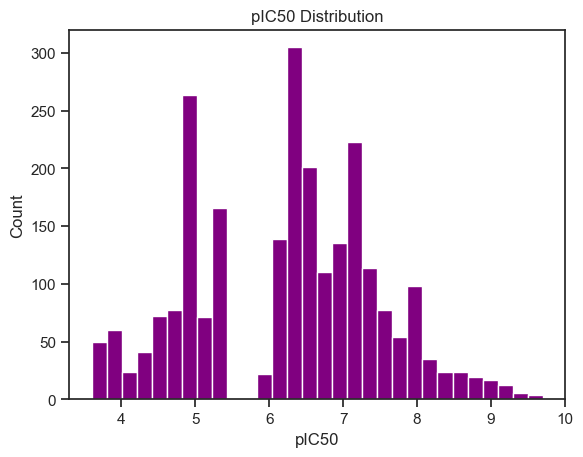

<Figure size 640x480 with 0 Axes>

In [32]:
plt.hist(df_clean["pIC50"], bins=30,color="purple")
plt.xlabel("pIC50")
plt.ylabel("Count")
plt.title("pIC50 Distribution")
plt.show()
plt.savefig('histogram_pic50.pdf')

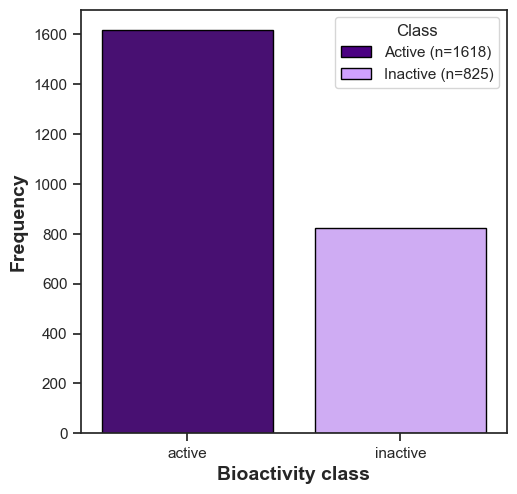

In [38]:
plt.figure(figsize=(5.5, 5.5))

palette = {
    "active": "#4B0082",     # dark purple
    "inactive": "#CFA0FF"    # light purple
}

ax = sns.countplot(
    x="bioactivity_class",
    data=df_clean,
    hue="bioactivity_class",
    palette=palette,
    edgecolor="black",
    legend=False   # prevents duplicate legend
)

# Get counts
counts = df_clean["bioactivity_class"].value_counts()

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#4B0082", edgecolor="black",
          label=f"Active (n={counts.get('active',0)})"),
    Patch(facecolor="#CFA0FF", edgecolor="black",
          label=f"Inactive (n={counts.get('inactive',0)})")
]

plt.legend(handles=legend_elements, title="Class", loc="upper right")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.show()

### Lipinski's Descriptor Calculation
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

### Molecular weight < 500 Dalton
### Octanol-water partition coefficient (LogP) < 5
### Hydrogen bond donors < 5
### Hydrogen bond acceptors < 10

In [39]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/24.3 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.3 MB 9.0 MB/s eta 0:00:03
   ----- ---------------------------------- 3.1/24.3 MB 9.1 MB/s eta 0:00:03
   ------- -------------------------------- 4.7/24.3 MB 8.1 MB/s eta 0:00:03
   --------- ------------------------------ 6.0/24.3 MB 7.9 MB/s eta 0:00:03
   ------------- -------------------------- 8.4/24.3 MB 8.5 MB/s eta 0:00:02
   ----------------- ---------------------- 10.5/24.3 MB 8.6 MB/s eta 0:00:02
   -------------------- ------------------- 12.6/24.3 MB 8.7 MB/s eta 0:00:02
   ---------------------- ----------------- 13.9/24.3 MB 8.3 MB/s eta 0:00:02
   ------------------------- -------------- 15.5/24.3 MB 8.1 MB/s eta 0:00:02
   ---------------------------- ----------- 17.3/24.3 MB 8.2 MB/s eta 0:00:01
   ------------------------------- -------- 18.9/24.3 MB 8.3 MB/s eta 0:00:01

In [40]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import rdMolDescriptors

We need to remove any kind of salt from our compond and remain just actual bioactive molecule

In [41]:
df_no_smiles = df_clean.drop(columns='canonical_smiles')

smiles = []

for i in df_clean.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key=len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name='canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)

df_clean_smiles


,molecule_chembl_id,standard_value,bioactivity_class,pIC50,canonical_smiles
0,CHEMBL5821675,302.50,active,6.519275,C#CC(=O)N1CC[C@H](C(=O)N(C)[C@H](C(=O)N[C@H]2C...
1,CHEMBL5979784,67.00,active,7.173925,C#CCNc1cccc(F)c1-c1nc2c(cc1Cl)c(N1C[C@@H](C)N(...
2,CHEMBL5930957,1.60,active,8.795880,C#CCc1ccc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC3...
3,CHEMBL5969896,5275.00,inactive,5.277778,C#CCn1c(-c2cccnc2[C@H](C)OC)c2c3cc(ccc31)-c1cc...
4,CHEMBL5612217,1.99,active,8.701147,C#Cc1c(F)ccc2cc(N)cc(-c3ncc4c(N(C)[C@H]5C[C@@H...
...,...,...,...,...,...
2438,CHEMBL4855521,0.51,active,9.292430,[2H]C1([2H])Oc2ccc(F)c(F)c2-c2nc3c(cc2Cl)c(N2C...
2439,CHEMBL5275944,50.00,active,7.301030,[2H][C@H]1CN2CCC[C@@]2(COc2nc(N3CC4CCC3CN4)c3c...
2440,CHEMBL6052900,16667.00,inactive,4.778143,[O-][N+]12CCCC1(COc1nc(N3CC4CCC(C3)N4)c3cnc(-c...
2441,CHEMBL5753679,8447.00,inactive,5.073298,[O-][S+]1CCC(Oc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cc(...


### Calculate descriptors

In [42]:

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [44]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski.head(10)

,MW,LogP,NumHDonors,NumHAcceptors
0,902.106,5.41630,3.0,11.0
1,628.152,5.72372,1.0,8.0
2,528.632,3.66000,2.0,8.0
3,898.118,5.87680,2.0,10.0
4,570.619,5.40660,1.0,7.0
5,571.603,5.53000,1.0,7.0
6,571.603,5.53000,1.0,7.0
7,571.603,5.53000,1.0,7.0
8,577.582,5.31190,1.0,7.0
9,571.603,5.53000,1.0,7.0


In [45]:
df_lipinski.shape

(2443, 4)

Combine Both datasets

In [50]:
from IPython.display import display

print("df_lipinski:")
display(df_lipinski.head())

print("df_clean_smiles:")
display(df_clean_smiles.head())

df_lipinski:


,MW,LogP,NumHDonors,NumHAcceptors
0,902.106,5.41630,3.0,11.0
1,628.152,5.72372,1.0,8.0
2,528.632,3.66000,2.0,8.0
3,898.118,5.87680,2.0,10.0
4,570.619,5.40660,1.0,7.0


df_clean_smiles:


,molecule_chembl_id,standard_value,bioactivity_class,pIC50,canonical_smiles
0,CHEMBL5821675,302.50,active,6.519275,C#CC(=O)N1CC[C@H](C(=O)N(C)[C@H](C(=O)N[C@H]2C...
1,CHEMBL5979784,67.00,active,7.173925,C#CCNc1cccc(F)c1-c1nc2c(cc1Cl)c(N1C[C@@H](C)N(...
2,CHEMBL5930957,1.60,active,8.795880,C#CCc1ccc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC3...
3,CHEMBL5969896,5275.00,inactive,5.277778,C#CCn1c(-c2cccnc2[C@H](C)OC)c2c3cc(ccc31)-c1cc...
4,CHEMBL5612217,1.99,active,8.701147,C#Cc1c(F)ccc2cc(N)cc(-c3ncc4c(N(C)[C@H]5C[C@@H...


In [51]:
df_combined = pd.concat([df_clean_smiles, df_lipinski], axis=1)
df_combined.head()

,molecule_chembl_id,standard_value,bioactivity_class,pIC50,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL5821675,302.50,active,6.519275,C#CC(=O)N1CC[C@H](C(=O)N(C)[C@H](C(=O)N[C@H]2C...,902.106,5.41630,3.0,11.0
1,CHEMBL5979784,67.00,active,7.173925,C#CCNc1cccc(F)c1-c1nc2c(cc1Cl)c(N1C[C@@H](C)N(...,628.152,5.72372,1.0,8.0
2,CHEMBL5930957,1.60,active,8.795880,C#CCc1ccc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC3...,528.632,3.66000,2.0,8.0
3,CHEMBL5969896,5275.00,inactive,5.277778,C#CCn1c(-c2cccnc2[C@H](C)OC)c2c3cc(ccc31)-c1cc...,898.118,5.87680,2.0,10.0
4,CHEMBL5612217,1.99,active,8.701147,C#Cc1c(F)ccc2cc(N)cc(-c3ncc4c(N(C)[C@H]5C[C@@H...,570.619,5.40660,1.0,7.0


In [52]:
df_combined = df_combined.drop(columns="standard_value")
df_combined.head()

,molecule_chembl_id,bioactivity_class,pIC50,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL5821675,active,6.519275,C#CC(=O)N1CC[C@H](C(=O)N(C)[C@H](C(=O)N[C@H]2C...,902.106,5.41630,3.0,11.0
1,CHEMBL5979784,active,7.173925,C#CCNc1cccc(F)c1-c1nc2c(cc1Cl)c(N1C[C@@H](C)N(...,628.152,5.72372,1.0,8.0
2,CHEMBL5930957,active,8.795880,C#CCc1ccc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC3...,528.632,3.66000,2.0,8.0
3,CHEMBL5969896,inactive,5.277778,C#CCn1c(-c2cccnc2[C@H](C)OC)c2c3cc(ccc31)-c1cc...,898.118,5.87680,2.0,10.0
4,CHEMBL5612217,active,8.701147,C#Cc1c(F)ccc2cc(N)cc(-c3ncc4c(N(C)[C@H]5C[C@@H...,570.619,5.40660,1.0,7.0


In [53]:
# Save CSV
df_combined.to_csv("df_lipinski.csv", index=False)

### Exploratory Data Analysis or Chemical Space Analysis For Lipinski Descriptors
### Boxplot of the bioactivity classes
### Scatter of Molecular Weight vs Solubility (LogP)


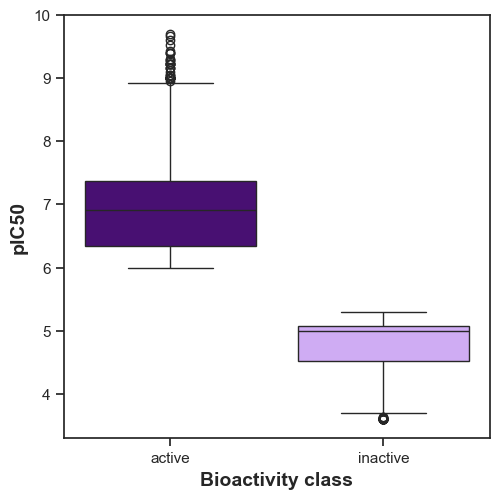

In [58]:
plt.figure(figsize=(5.5, 5.5))

palette = {
    "active": "#4B0082",    # dark violet
    "inactive": "#CFA0FF"   # light violet
}

sns.boxplot(
    x="bioactivity_class",
    y="pIC50",
    data=df_combined,
    hue="bioactivity_class",
    palette=palette
)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')

plt.savefig('boxplot_bioactivity_class.pdf')
plt.show()

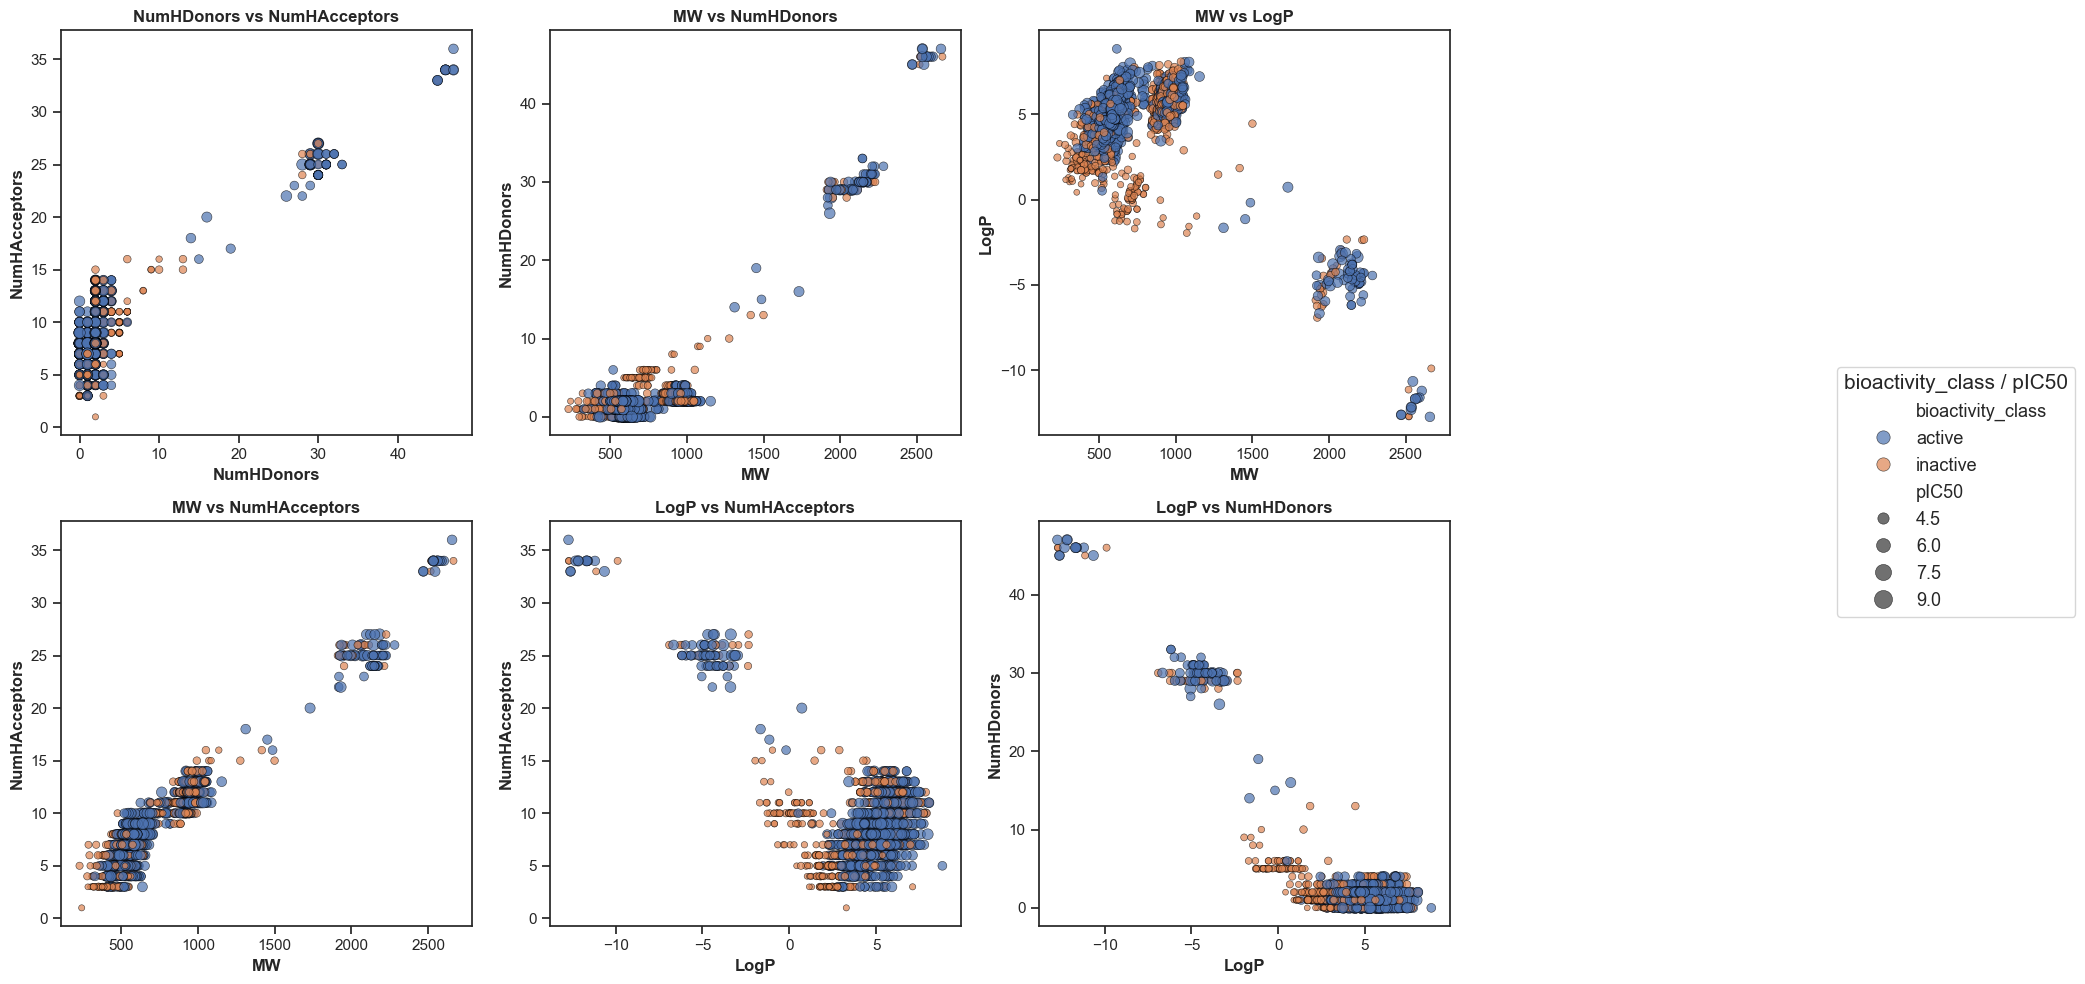

In [68]:
pairs = [
    ("NumHDonors",    "NumHAcceptors", "NumHDonors vs NumHAcceptors"),
    ("MW",            "NumHDonors",    "MW vs NumHDonors"),
    ("MW",            "LogP",          "MW vs LogP"),
    ("MW",            "NumHAcceptors", "MW vs NumHAcceptors"),
    ("LogP",          "NumHAcceptors", "LogP vs NumHAcceptors"),
    ("LogP",          "NumHDonors",    "LogP vs NumHDonors"),
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (ax, (x, y, title)) in enumerate(zip(axes, pairs)):
    sns.scatterplot(
        x=x, y=y,
        data=df_combined,
        hue="bioactivity_class",
        size="pIC50",
        
        edgecolor="black",
        alpha=0.7,
        ax=ax,
        legend=(i == 0)   # only first subplot creates legend data
    )
    ax.set_xlabel(x, fontsize=12, fontweight="bold")
    ax.set_ylabel(y, fontsize=12, fontweight="bold")
    ax.set_title(title, fontsize=12, fontweight="bold")

# Extract legend from first subplot
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend_.remove()  # remove internal legend

# Create large outer legend
fig.legend(
    handles,
    labels,
    title="bioactivity_class / pIC50",
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    fontsize=13,        # legend text
    title_fontsize=15,  # legend title
    markerscale=1.6     # bigger legend markers
)

plt.tight_layout(rect=[0, 0, 0.82, 1])
plt.savefig("scatter_panel_3x2.pdf", bbox_inches="tight")
plt.show()


### Statistical analysis (Mann-Whitney U Test)
is a statistical test used to compare two groups to see if they are significantly different from each other.
It is often used in QSAR and bioactivity studies when comparing properties of active vs inactive compounds.
Against t-test,Mann–Whitney U test is more robust to outliers,robust to outliers instead of means,No normality assumption agains p-value that Assumes normal distribution

### Note:
Typical use in your QSAR workflow
You test each descriptor:MW,LogP,NumHDonors,NumHAcceptors,pIC50

To check:
Which properties significantly differ between active and inactive molecules.

In [69]:
def mannwhitney(descriptor, df_combined, verbose=False):
    """
    Perform Mann-Whitney U test between active and inactive compounds
    for a given descriptor.

    Parameters:
    - descriptor : str, column name of the descriptor
    - df_combined : pandas DataFrame, must have columns [descriptor, bioactivity_class]
    - verbose : bool, if True prints the test statistics

    Returns:
    - results : pandas DataFrame with test statistics, p-value, and interpretation
    """
    from numpy.random import seed
    from scipy.stats import mannwhitneyu
    import pandas as pd

    # set seed for reproducibility
    seed(1)

    # select only relevant columns
    df = df_combined[[descriptor, 'bioactivity_class']]

    # separate active and inactive compounds
    active = df[df['bioactivity_class'] == 'active'][descriptor]
    inactive = df[df['bioactivity_class'] == 'inactive'][descriptor]

    # perform Mann-Whitney U test
    stat, p = mannwhitneyu(active, inactive)

    if verbose:
        print(f"Descriptor: {descriptor}")
        print(f"Statistics={stat:.3f}, p={p:.3f}")

    # interpret result
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    # store results in a DataFrame
    results = pd.DataFrame({
        'Descriptor': descriptor,
        'Statistics': stat,
        'p': p,'alpha': alpha,
        'Interpretation': interpretation
    }, index=[0])

    # save results to CSV
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename, index=False)
    return results

### pIC50

In [70]:
mannwhitney("pIC50", df_combined, verbose=True)

Descriptor: pIC50
Statistics=1334850.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1334850.0,0.0,0.05,Different distribution (reject H0)


### Molecular Weight

In [71]:
mannwhitney("MW", df_combined, verbose=True)

Descriptor: MW
Statistics=675238.500, p=0.636


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,675238.5,0.635606,0.05,Same distribution (fail to reject H0)


### Solubility LogP

In [72]:
mannwhitney("LogP", df_combined, verbose=True)
     

Descriptor: LogP
Statistics=793193.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,793193.0,2.390207e-14,0.05,Different distribution (reject H0)


### Number of Hydrogen Donors

In [73]:
mannwhitney("NumHDonors", df_combined, verbose=True)

Descriptor: NumHDonors
Statistics=491642.500, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,491642.5,1.019302e-28,0.05,Different distribution (reject H0)


### Number of Hydrogen Acceptors

In [74]:
mannwhitney("NumHAcceptors", df_combined, verbose=True)

Descriptor: NumHAcceptors
Statistics=656825.500, p=0.518


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,656825.5,0.517512,0.05,Same distribution (fail to reject H0)


### Combine All Statistical Results

In [75]:
import pandas as pd
import glob
import os

# Get list of all Mann-Whitney CSV files in current folder
mw_files = glob.glob("mannwhitneyu_*.csv")

# Combine them into one DataFrame
mw_combined = pd.concat([pd.read_csv(f) for f in mw_files], ignore_index=True)

# Save combined CSV
combined_filename = "mannwhitney_summary.csv"
mw_combined.to_csv(combined_filename, index=False)

print(f"Combined Mann-Whitney CSV saved as {combined_filename}")

Combined Mann-Whitney CSV saved as mannwhitney_summary.csv


In [81]:
mw_combined

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,793193.0,2.390207e-14,0.05,Different distribution (reject H0)
1,MW,675238.5,6.356061e-01,0.05,Same distribution (fail to reject H0)
2,NumHAcceptors,656825.5,5.175124e-01,0.05,Same distribution (fail to reject H0)
3,NumHDonors,491642.5,1.019302e-28,0.05,Different distribution (reject H0)
4,pIC50,1334850.0,0.000000e+00,0.05,Different distribution (reject H0)


### Interpretation:
LogP,NumHDonors,& NumHDonors are yieling to the value < 0.04 that indicates these features are significantly discriminate between 
Active & Inactive compounds.While MW & NumHAcceptors show no significant difference between our target groups.

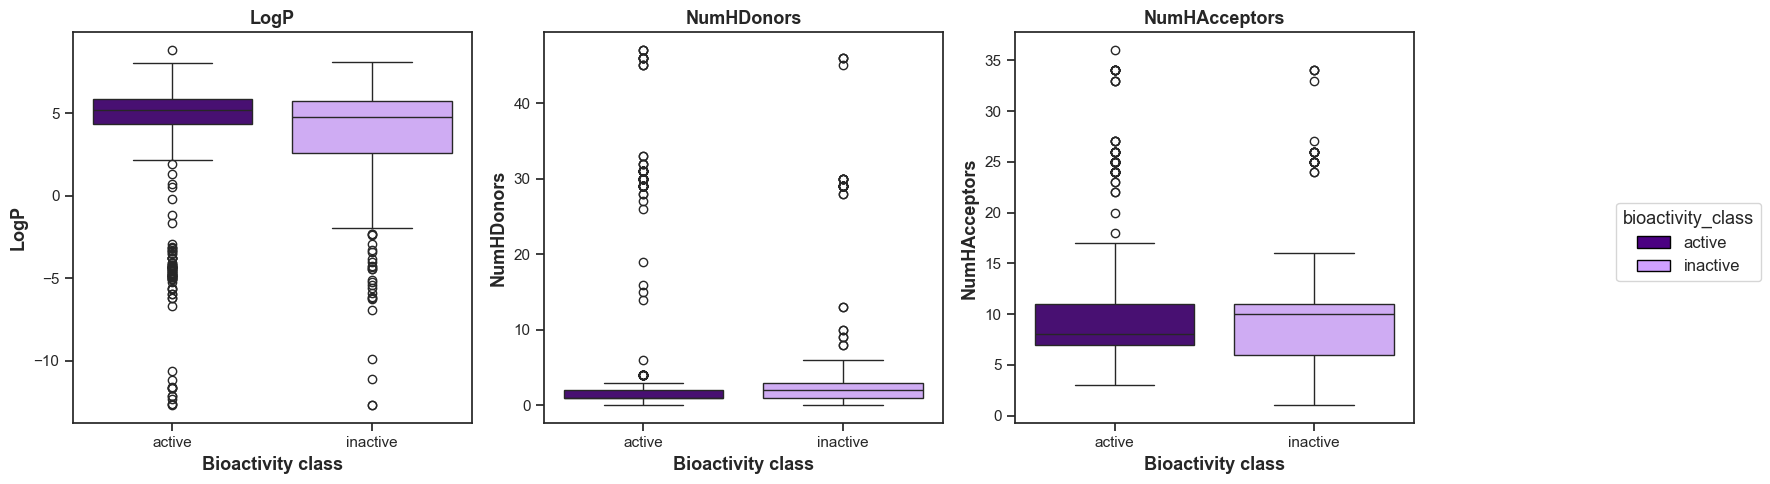

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Colors
palette = {
    "active": "#4B0082",    # dark violet
    "inactive": "#CFA0FF"   # light violet
}

# What to plot
ys = ["LogP", "NumHDonors", "NumHAcceptors"]
titles = ["LogP", "NumHDonors", "NumHAcceptors"]

# Create 1 row x 3 columns panel
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True)

for ax, y, title in zip(axes, ys, titles):
    sns.boxplot(
        x="bioactivity_class",
        y=y,
        data=df_combined,
        hue="bioactivity_class",
        palette=palette,
        ax=ax
    )

    ax.set_xlabel("Bioactivity class", fontsize=13, fontweight="bold")
    ax.set_ylabel(title, fontsize=13, fontweight="bold")
    ax.set_title(title, fontsize=13, fontweight="bold")

    # Remove subplot legend safely (only if it exists)
    if ax.legend_ is not None:
        ax.legend_.remove()

# ONE legend for the whole figure (with your colors)
legend_elements = [
    Patch(facecolor=palette["active"], edgecolor="black", label="active"),
    Patch(facecolor=palette["inactive"], edgecolor="black", label="inactive"),
]

fig.legend(
    handles=legend_elements,
    title="bioactivity_class",
    loc="center left",
    bbox_to_anchor=(1.01, 0.5),
    fontsize=12,
    title_fontsize=13
)

# Layout + save
plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave room on the right for legend
plt.savefig("boxplot_panel_1x3.pdf", bbox_inches="tight")
plt.show()

In [87]:
import zipfile
import glob

zip_filename = "EDA_results.zip"

files = glob.glob("*df_lipinski.csv") + \
        glob.glob("*mannwhitney_summary.csv") + \
        glob.glob("*.pdf")

with zipfile.ZipFile(zip_filename, 'w') as z:
    for file in files:
        z.write(file)

print("ZIP file created:", zip_filename)

ZIP file created: EDA_results.zip
